In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [3]:
Y_data = digits.target

Y = pd.get_dummies(Y_data).values

Y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [4]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, Y, test_size=0.2)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
Total params: 17,226
Trainable params: 17,226
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
45/45 [==============================] - 1s 7ms/step - loss: 1.5753 - accuracy: 0.6033 - val_loss: 0.3954 - val_accuracy: 0.8806
Epoch 2/30
45/45 [==============================] - 0s 4ms/step - loss: 0.2736 - accuracy: 0.9137 - val_loss: 0.2202 - val_accuracy: 0.9361
Epoch 3/30
45/45 [==============================] - 0s 4ms/step - loss: 0.1324 - accuracy: 0.9659 - val_loss: 0.1626 - val_accuracy: 0.9667
Epoch 4/30
45/45 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9756 - val_loss: 0.1688 - val_accuracy: 0.9556
Epoch 5/30
45/45 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 0.9910 - val_loss: 0.1371 - val_accuracy: 0.9694
Epoch 6/30
45/45 [==============================] - 0s 4ms/step - loss: 0.0552 - accuracy: 0.9854 - val_loss: 0.1321 - val_accuracy: 0.9639
Epoch 7/30
45/45 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9944 - val_loss: 0.1098 - val_accuracy: 0.9667
Epoch 8/30
45/45 [==

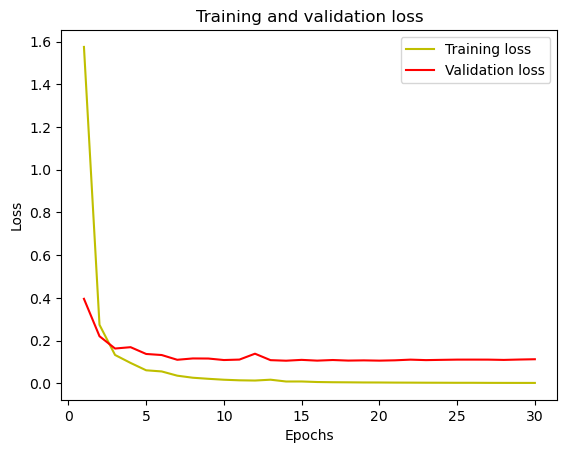

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.98        30
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        41
           5       0.94      0.92      0.93        36
           6       1.00      1.00      1.00        44
           7       0.94      0.97      0.96        35
           8       1.00      0.97      0.98        32
           9       0.89      0.92      0.91        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  3]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0